## Zezheng Li HW4

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import pandas as pd


# Q1

## Access Data

In [3]:
data = pd.read_csv("D:\Baruch immersion\Python\python-workshop-master\session4\example\input\compustat.csv")
data = data.loc[:,['sic','datacqtr','cusip','cshoq','saleq','prccq']] # the data we interest

In [4]:
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


In [5]:
data['mktcap'] = data['cshoq']*data['prccq']
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


## Caculate Statistics

In [6]:
print('saleq mean: ',data['saleq'].mean())
print('mktcap cap mean: ',data['mktcap'].dropna().mean())
print('saleq standard deviation: ',data['saleq'].std())
print('mktcap standard deviation: ',data['mktcap'].std())
print('saleq missing count: ',data['saleq'].isna().sum())
print('mktcap missing count: ',data['mktcap'].isna().sum())
print('saleq missing ratio: ',data['saleq'].isna().sum()/data.shape[0])
print('mktcap missing ratio: ',data['mktcap'].isna().sum()/data.shape[0])

saleq mean:  445.1506638794169
mktcap cap mean:  2057.4731042026106
saleq standard deviation:  2679.706576405277
mktcap standard deviation:  13202.197457099168
saleq missing count:  269498
mktcap missing count:  468276
saleq missing ratio:  0.14878714116222666
mktcap missing ratio:  0.25853048005878654


In [7]:
#Aggregate everything into a DataFrame, use nested dictionary
res = {'saleq':{'mean':data['saleq'].mean(),'std':data['saleq'].std(),'missing count':data['saleq'].isna().sum(),'missing ratio':data['saleq'].isna().sum()/data.shape[0]},
      'market cap':{'mean':data['mktcap'].mean(),'std':data['mktcap'].std(),'missing count':data['mktcap'].isna().sum(),'missing ratio':data['mktcap'].isna().sum()/data.shape[0]}}
sta = pd.DataFrame(res)
sta

,saleq,market cap
mean,445.150664,2057.473104
std,2679.706576,13202.197457
missing count,269498.000000,468276.000000
missing ratio,0.148787,0.258530


## Detect Outliers

In [8]:
#Z-Score Method, exclude the samples beyond 3 standard deviation as ourliers, i.e. z-score > 3 or z-score < -3
from scipy import stats as st
data['z_saleq'] = pd.Series(st.zscore(pd.Series(data['saleq']).dropna()),index = pd.Series(data['saleq']).dropna().index)
data['z_mktcap'] = pd.Series(st.zscore(pd.Series(data['mktcap']).dropna()),index = pd.Series(data['mktcap']).dropna().index)
out_saleq = data['z_saleq'][np.abs(data['z_saleq'])>3] # outlier of saleq
out_mktcap = data['z_mktcap'][np.abs(data['z_mktcap'])>3] # outlier of market cap
print('number of outliers in saleq: ',out_saleq.count())
print('number of outliers in market cap: ',out_mktcap.count())


number of outliers in saleq:  15098
number of outliers in market cap:  12626


## outliers for saleq

In [9]:
data[np.abs(data['z_saleq'])>3]

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap,z_saleq,z_mktcap
2486,4512.0,2014Q1,02376R102,649.953,9995.0,36.60,23788.27980,3.563768,1.646000
2487,4512.0,2014Q2,02376R102,720.502,11356.0,42.96,30952.76592,4.071660,2.188674
2488,4512.0,2014Q3,02376R102,717.258,11139.0,35.48,25448.31384,3.990681,1.771739
2489,4512.0,2014Q4,02376R102,697.475,10160.0,53.63,37405.58425,3.625342,2.677442
2490,4512.0,2015Q1,02376R102,693.801,9827.0,52.78,36618.81678,3.501075,2.617849
...,...,...,...,...,...,...,...,...,...
1809831,2820.0,2019Q3,N53745100,333.408,8722.0,89.47,29830.01376,3.088716,2.103631
1809870,3523.0,2012Q4,N20944109,1222.560,31529.0,NaN,NaN,11.599725,NaN
1809872,3523.0,2013Q2,N20944109,NaN,8529.0,NaN,NaN,3.016693,NaN
1809874,3523.0,2013Q4,N20944109,1350.074,8977.0,11.35,15323.33990,3.183875,1.004823


## outliers for market cap

In [10]:
data[np.abs(data['z_mktcap'])>3]

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap,z_saleq,z_mktcap
4511,3845.0,1997Q1,002824100,773.116,2999.814,56.125,43391.13550,0.953337,3.130818
4512,3845.0,1997Q2,002824100,770.405,2900.408,66.750,51424.53375,0.916241,3.739308
4513,3845.0,1997Q3,002824100,765.920,2865.184,63.937,48970.62704,0.903097,3.553437
4514,3845.0,1997Q4,002824100,764.094,3118.056,65.500,50048.15700,0.997462,3.635054
4515,3845.0,1998Q1,002824100,763.355,3044.913,75.312,57489.79176,0.970167,4.198721
...,...,...,...,...,...,...,...,...,...
1809811,2820.0,2014Q3,N53745100,504.006,12066.000,108.660,54765.29196,4.336614,3.992353
1809813,2820.0,2015Q1,N53745100,475.380,8185.000,87.800,41738.36400,2.888321,3.005629
1809814,2820.0,2015Q2,N53745100,468.082,9145.000,103.520,48455.84864,3.246569,3.514445
1809824,2820.0,2017Q4,N53745100,394.512,9135.000,110.320,43522.56384,3.242837,3.140773


Reasons for outliers could be some special cases, like financial crisis where the saleq and mktcap could go downward dramatically, or the boom period where the saleq and mktcap could go upward dramatically.
Sometimes it could be a fund raising or corperate merge that dramatically effect individual company, or even some manual operation error.


# Q2

In [11]:
data_HHI = pd.DataFrame(data,columns=['sic','datacqtr','mktcap']) # data we are interested in
data_HHI = data_HHI.dropna() # get rid of all the nan value
data_HHI.sic = data_HHI.sic.astype(str) 
data_HHI.sic = data_HHI.sic.str[:2] # keep the first two digits of sic
#data_HHI = data_HHI.reset_index()
data_HHI

,sic,datacqtr,mktcap
18,30,1970Q3,26.202500
19,30,1970Q4,24.460000
20,30,1971Q1,34.193250
21,30,1971Q2,29.023500
22,30,1971Q3,16.256875
...,...,...,...
1811284,28,2020Q1,65.485200
1811286,28,2019Q2,39.935590
1811287,28,2019Q3,36.755800
1811288,28,2019Q4,32.249750


In [12]:
data_HHI['cap_sum'] = data_HHI.groupby(['sic','datacqtr'])['mktcap'].transform(sum) #total industry sales by quarter

In [13]:
#compute HHI
data_HHI['market percent'] = data_HHI['mktcap'] / data_HHI['cap_sum'] 
data_HHI['raw value'] = data_HHI['market percent']*100
data_HHI['raw value square'] = data_HHI['raw value']*data_HHI['raw value']
data_HHI['HHI'] = data_HHI.groupby(['sic','datacqtr'])['raw value square'].transform(sum)
data_HHI['HHI Avarage'] = data_HHI.groupby(['sic'])['HHI'].transform('mean')
data_HHI

,sic,datacqtr,mktcap,cap_sum,market percent,raw value,raw value square,HHI,HHI Avarage
18,30,1970Q3,26.202500,6.289293e+03,0.004166,0.416621,1.735728e-01,1682.455305,1679.879381
19,30,1970Q4,24.460000,8.067256e+03,0.003032,0.303201,9.193083e-02,1424.771672,1679.879381
20,30,1971Q1,34.193250,8.700796e+03,0.003930,0.392990,1.544411e-01,1292.447644,1679.879381
21,30,1971Q2,29.023500,9.039094e+03,0.003211,0.321089,1.030979e-01,1296.213826,1679.879381
22,30,1971Q3,16.256875,9.224606e+03,0.001762,0.176234,3.105836e-02,1289.251544,1679.879381
...,...,...,...,...,...,...,...,...,...
1811284,28,2020Q1,65.485200,3.928648e+06,0.000017,0.001667,2.778433e-06,306.695458,360.116710
1811286,28,2019Q2,39.935590,4.902954e+06,0.000008,0.000815,6.634444e-07,264.060202,360.116710
1811287,28,2019Q3,36.755800,4.181405e+06,0.000009,0.000879,7.726935e-07,289.819318,360.116710
1811288,28,2019Q4,32.249750,5.275508e+06,0.000006,0.000611,3.737009e-07,265.621202,360.116710


In [14]:
# find the top 4 industries
NO_DUL = data_HHI.drop_duplicates('sic')
NO_DUL.sort_values('HHI Avarage',ascending=False)

,sic,datacqtr,mktcap,cap_sum,market percent,raw value,raw value square,HHI,HHI Avarage
1455994,86,1999Q2,322.031000,322.031000,1.000000,100.000000,10000.000000,10000.000000,10000.000000
708856,89,1987Q2,5.064000,5.064000,1.000000,100.000000,10000.000000,10000.000000,10000.000000
1240836,81,1995Q3,7.676784,7.676784,1.000000,100.000000,10000.000000,10000.000000,9134.847753
225009,84,1982Q3,9.301500,9.301500,1.000000,100.000000,10000.000000,10000.000000,8800.118852
221263,90,1982Q2,9.594000,9.594000,1.000000,100.000000,10000.000000,10000.000000,8726.336351
...,...,...,...,...,...,...,...,...,...
5116,13,1982Q1,4.300000,79379.909317,0.000054,0.005417,0.000029,603.248968,384.596336
1584,28,1984Q1,52.143750,146543.060830,0.000356,0.035583,0.001266,294.780903,360.116710
8051,60,1981Q4,11.275875,49939.432182,0.000226,0.022579,0.000510,201.916652,259.110647
4023,49,1972Q3,191.187500,64201.836312,0.002978,0.297791,0.088680,114.655230,158.453139


In [15]:


SIC_1 = data_HHI[data_HHI['sic'] == str(84)]
SIC_1.sort_values('datacqtr',ascending=True)
SIC_1


,sic,datacqtr,mktcap,cap_sum,market percent,raw value,raw value square,HHI,HHI Avarage
225009,84,1982Q3,9.30150,9.30150,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225010,84,1982Q4,11.44800,11.44800,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225011,84,1983Q1,14.66775,14.66775,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225012,84,1983Q2,14.31000,14.31000,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225013,84,1983Q3,12.16350,12.16350,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225014,84,1983Q4,11.80575,11.80575,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225015,84,1984Q1,9.65925,11.01675,0.876779,87.677854,7687.406113,7839.241391,8800.118852
225016,84,1984Q2,8.94375,11.63750,0.768528,76.852846,5906.360000,6442.150720,8800.118852
225017,84,1984Q3,8.58600,11.27975,0.761187,76.118708,5794.057754,6364.373847,8800.118852
225018,84,1984Q4,10.01700,10.82297,0.925532,92.553153,8566.086159,8621.541687,8800.118852


In [16]:
import matplotlib.pyplot as plt

#industry 89
SIC_89 = data_HHI[data_HHI['sic'] == str(89)]
SIC_89.sort_values('datacqtr',ascending=True)


#industry 86
SIC_86 = data_HHI[data_HHI['sic'] == str(86)]
SIC_86.sort_values('datacqtr',ascending=True)


#industry 81
SIC_81 = data_HHI[data_HHI['sic'] == str(81)]
SIC_81.sort_values('datacqtr',ascending=True)


#industry 84
SIC_84 = data_HHI[data_HHI['sic'] == str(84)]
SIC_84.sort_values('datacqtr',ascending=True)


,sic,datacqtr,mktcap,cap_sum,market percent,raw value,raw value square,HHI,HHI Avarage
225009,84,1982Q3,9.30150,9.30150,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225010,84,1982Q4,11.44800,11.44800,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225011,84,1983Q1,14.66775,14.66775,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225012,84,1983Q2,14.31000,14.31000,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225013,84,1983Q3,12.16350,12.16350,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225014,84,1983Q4,11.80575,11.80575,1.000000,100.000000,10000.000000,10000.000000,8800.118852
225015,84,1984Q1,9.65925,11.01675,0.876779,87.677854,7687.406113,7839.241391,8800.118852
383361,84,1984Q1,1.35750,11.01675,0.123221,12.322146,151.835278,7839.241391,8800.118852
225016,84,1984Q2,8.94375,11.63750,0.768528,76.852846,5906.360000,6442.150720,8800.118852
383362,84,1984Q2,2.69375,11.63750,0.231472,23.147154,535.790720,6442.150720,8800.118852


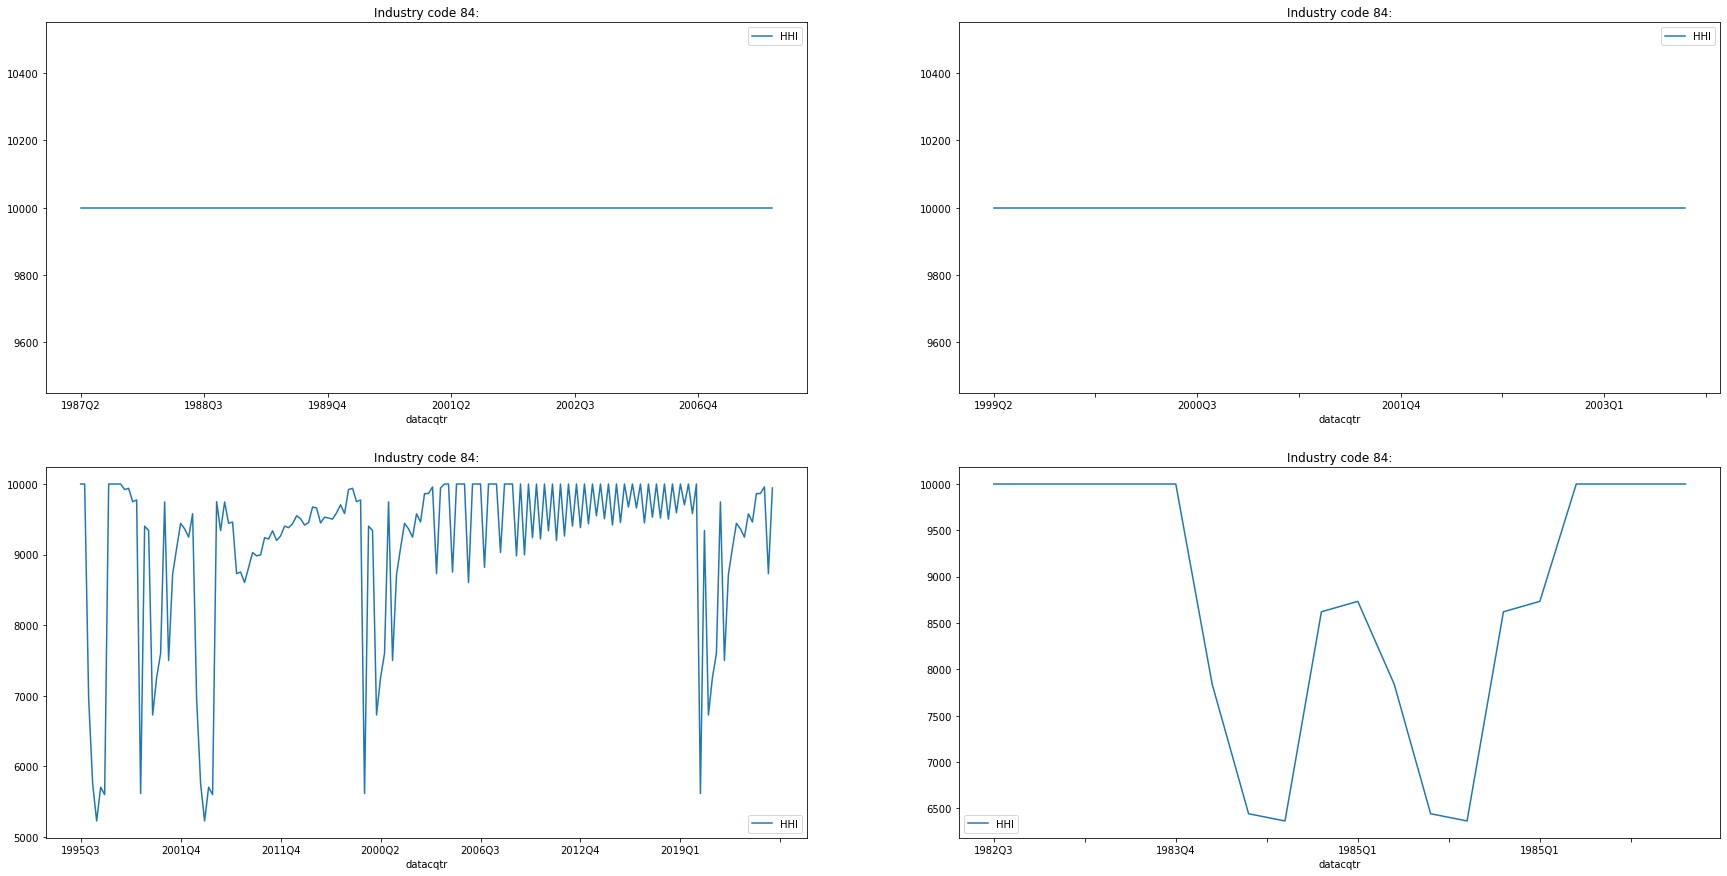

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 15))
SIC_89.plot(x = 'datacqtr',y = 'HHI' , title = 'Industry code 84:', ax = axes[0,0])
SIC_86.plot(x = 'datacqtr',y = 'HHI' , title = 'Industry code 84:', ax = axes[0,1])
SIC_81.plot(x = 'datacqtr',y = 'HHI' , title = 'Industry code 84:', ax = axes[1,0])
SIC_84.plot(x = 'datacqtr',y = 'HHI' , title = 'Industry code 84:', ax = axes[1,1])